In [6]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame

In [7]:
# set up the titanic csv file as a dataframe

titanic_df = pd.read_csv('train.csv')

#preview
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# We could also get overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
#first, some basic questions:

#1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
#2. What deck were the passengers on and how does that relate to their class?
#3. Where did the passengers come from?
#4. Who was alone and who was with family?

# Then we'll dig deeper, with a broader question:

#4. What factors helped someone survive the sinking?


#let's start with the first question: 
#1. Who were the passengers on the titanic?

#Let's import what we'll need for the analysis and visualization

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

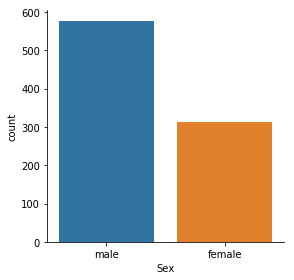

In [55]:
sns.factorplot(x= 'Sex',data=titanic_df,kind='count')

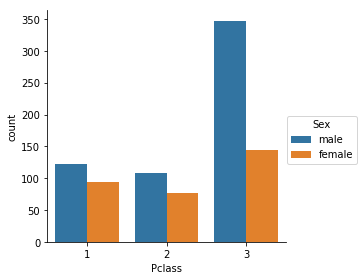

In [56]:
# Now let's seperate the genders (sex) by classes 
# x = 'Pclass'
#use the 'hue' arguement here!
# hue = 'sex' => separate each class further by gender

sns.factorplot(x='Pclass',data=titanic_df, kind = 'count',hue='Sex')

In [11]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# Revisit Lecture 45 for a refresher on how to do this.

# First let's make a function (passenger) to sort through the sex 
def male_female_child(passenger):
    #take the Age and Sex
    age,sex = passenger
    #compaer the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else: 
        return sex

In [12]:
# We'll define a new column called 'person' 
#remember to specify axis=1 for columns and not index

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [29]:
# Let's see if this worked, check out the first ten rows

titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


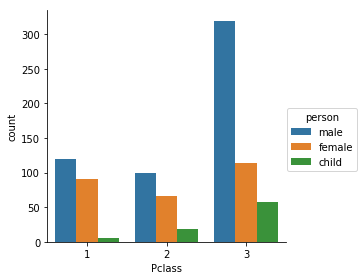

In [57]:
# Let's try the factorplot again!

import seaborn as sns
sns.factorplot(x='Pclass',data=titanic_df,kind='count',hue='person')

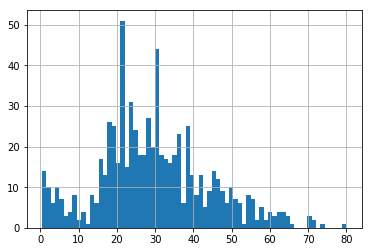

In [17]:
# Quick way to create a histogram using pandas .hist()
titanic_df['Age'].hist(bins=70)

In [18]:
# We could also get a quick overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [19]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.

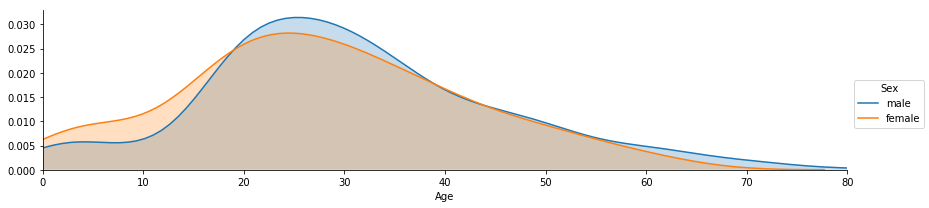

In [26]:
fig = sns.FacetGrid(titanic_df, hue = "Sex", aspect = 4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice

fig.map(sns.kdeplot,'Age',shade=True)

#set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#since we know no one can be negative years old
#set the x lower limit at 0
fig.set(xlim = (0,oldest))
fig.add_legend()

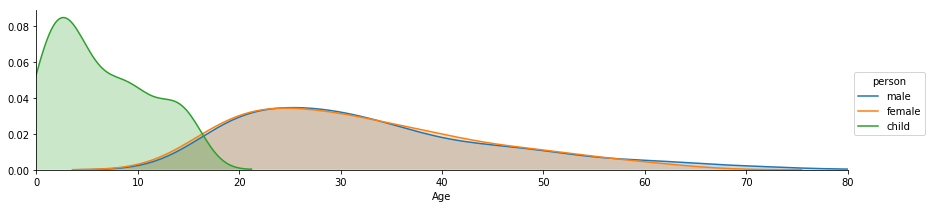

In [24]:
# We could have done the same thing for the 'person' column to include children:
# by changing the hue argument

fig= sns.FacetGrid(titanic_df, hue = 'person', aspect = 4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

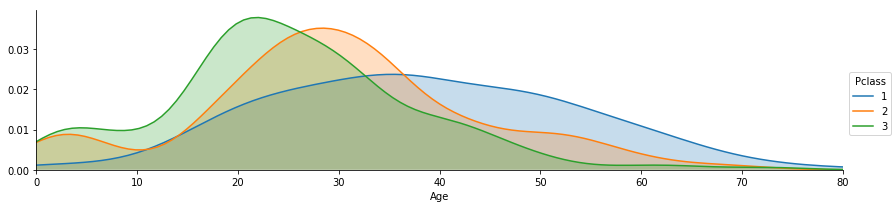

In [25]:
#let's do the same for Class by changing the hue argument

fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [27]:
#move on to our 2nd question: 
#What deck were the passengers on 
#and how does that relate to their class?



# Let's get a quick look at our dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [28]:
# First we'll drop the NaN values using the .dropna() method
#and create a new object: deck
deck = titanic_df['Cabin'].dropna()

In [29]:
#preview
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [59]:
# So let's grab that letter for the deck level with a simple "for" loop

#set empty list
levels = []

#loop to grab first letter
for level in deck:
    #for every item in the deck list (the Cabin column of original dataframe)
    #take the first letter of that item
    #then append (add) that letter to the empty list "levels"
    levels.append(level[0])

In [60]:
#preview
levels

['C',
 'C',
 'E',
 'G',
 'C',
 'D',
 'A',
 'C',
 'B',
 'D',
 'B',
 'C',
 'B',
 'C',
 'F',
 'F',
 'C',
 'E',
 'A',
 'D',
 'D',
 'C',
 'B',
 'E',
 'D',
 'F',
 'D',
 'C',
 'B',
 'F',
 'C',
 'E',
 'B',
 'A',
 'C',
 'F',
 'A',
 'F',
 'B',
 'B',
 'G',
 'A',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'G',
 'C',
 'B',
 'E',
 'B',
 'C',
 'C',
 'C',
 'D',
 'A',
 'B',
 'D',
 'C',
 'C',
 'B',
 'E',
 'C',
 'C',
 'E',
 'C',
 'B',
 'C',
 'E',
 'C',
 'D',
 'B',
 'C',
 'C',
 'C',
 'E',
 'T',
 'F',
 'C',
 'F',
 'C',
 'E',
 'D',
 'B',
 'E',
 'C',
 'B',
 'D',
 'G',
 'C',
 'E',
 'C',
 'E',
 'B',
 'C',
 'A',
 'C',
 'C',
 'C',
 'E',
 'D',
 'E',
 'E',
 'D',
 'A',
 'B',
 'C',
 'B',
 'C',
 'D',
 'C',
 'B',
 'C',
 'E',
 'D',
 'F',
 'B',
 'B',
 'C',
 'B',
 'B',
 'B',
 'C',
 'C',
 'A',
 'E',
 'C',
 'E',
 'E',
 'C',
 'A',
 'E',
 'B',
 'D',
 'A',
 'C',
 'F',
 'D',
 'D',
 'D',
 'A',
 'B',
 'B',
 'D',
 'A',
 'D',
 'E',
 'C',
 'B',
 'B',
 'D',
 'B',
 'B',
 'C',
 'F',
 'C',
 'E',
 'E',
 'C',
 'C',
 'C',
 'F',
 'C',
 'E',
 'E'

In [35]:
#create a new data frame that has only 1 column: Cabin (with null values dropped)
#and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns=['Cabin']

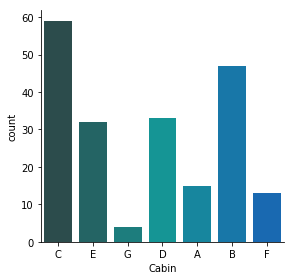

In [58]:
# create a bar plot with all the cabins, using factor plot
sns.factorplot(x='Cabin',data=cabin_df,kind='count',palette='winter_d')

In [61]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']

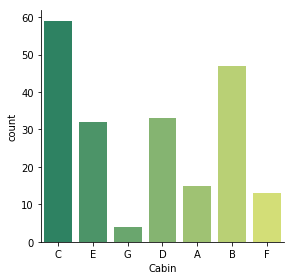

In [62]:
#replot 
sns.factorplot('Cabin',data=cabin_df,kind ='count',palette='summer')

In [63]:
# Let's take another look at our original data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [64]:
#answer our 3rd question:
#3. Where did the passengers come from?

#Note here that the Embarked column has C,Q,and S values.

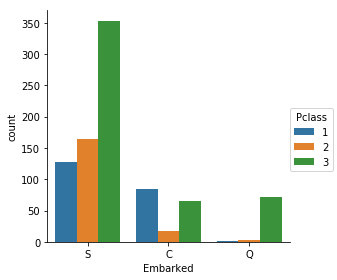

In [69]:
#make a quick factorplot to check out the results
#note the x_order argument, used to deal with NaN values
sns.factorplot('Embarked',data=titanic_df,kind='count',hue='Pclass')

AttributeError: Unknown property x_order

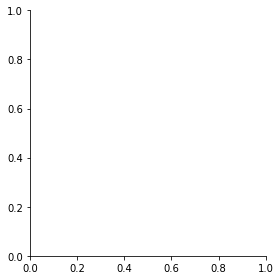

In [71]:
sns.factorplot(x='Embarked',data=titanic_df,
               kind='count',hue='Pclass',x_order=['C','Q','S'])


In [72]:
#Now let's take a look at the 4th question:
#Who was alone and who was with family?

In [73]:
# Let's start by adding a new column to define alone
# We'll add the parent/child column with the sibsp (siblings) column
titanic_df['Alone']=titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [74]:
# Look for >0 or ==0 to set alone status

titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone' 

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [75]:
# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

In [76]:
# Let's check to make sure it worked
#preview
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


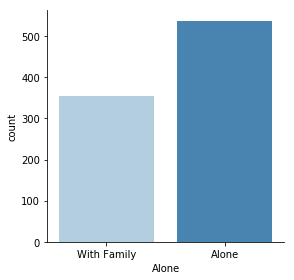

In [77]:
# Now let's get a simple visualization!
sns.factorplot(x='Alone',data=titanic_df,kind='count',palette='Blues')

In [78]:
#last (5th) question - the most interesting (and open-ended) question: 
#What factors helped someone survive the sinking?

In [79]:
# Let's start by creating a NEW column "Survivor" (double quotes) for legibility purposes through mapping (Lec 36)
# the original titanic_df has a column called 'Survived'
titanic_df["Survivor"] = titanic_df.Survived.map({0:"no",1:"yes"})

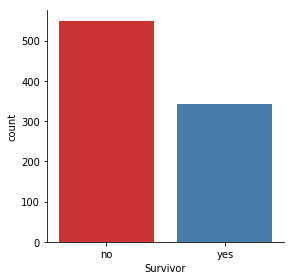

In [80]:
# Let's just get a quick overall view of survied vs died. 
sns.factorplot('Survivor',data=titanic_df,kind='count',palette='Set1')

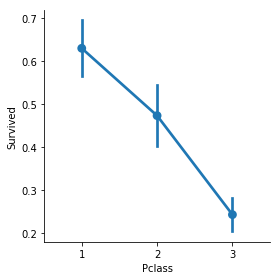

In [81]:
# Let's use a factor plot again, but now considering class
sns.factorplot(x='Pclass',y='Survived',data=titanic_df)

In [82]:
#Look like survival rates for the 3rd class are substantially lower!
#But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. 
#Let's use 'hue' to get a clearer picture on this.

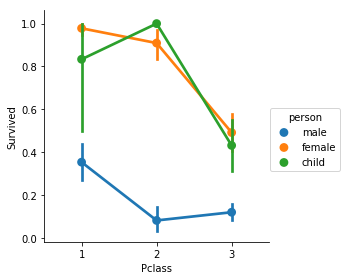

In [83]:
# Let's use a factor plot again, but now considering class and gender
sns.factorplot(x='Pclass',y='Survived',data=titanic_df,hue='person')

In [84]:
#From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

#But what about age? 
#Did being younger or older have an effect on survival rate?

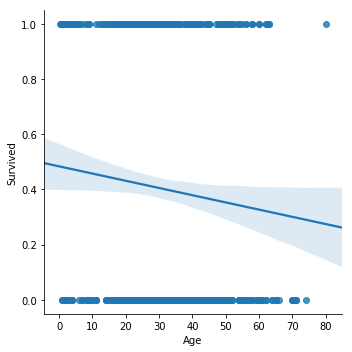

In [85]:
# Let's use a linear plot on age versus survival
sns.lmplot(x='Age',y='Survived',data=titanic_df)

In [87]:
#Looks like there is a general trend that the older the passenger was, the less likely they survived.
#Let's use hue to take a look at the effect of class and age.

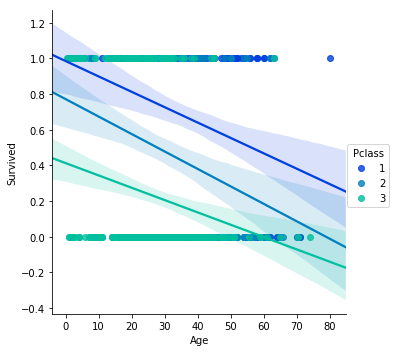

In [89]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass',palette='winter')

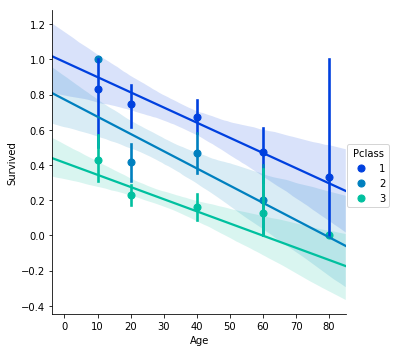

In [92]:
# Let's use a linear plot on age versus survival using hue for class seperation

#make a list of bins (using square brackets)
generations = [10,20,40,60,80]

# use the x_bin argument to clean up this figure  
#grab the data and bin it by age with a std (standard deviation?) attached!
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass',palette='winter',x_bins=generations)

In [93]:
#Interesting find on the older 1st class passengers! (high standard deviation)
#What about if we relate gender and age with the survival set?

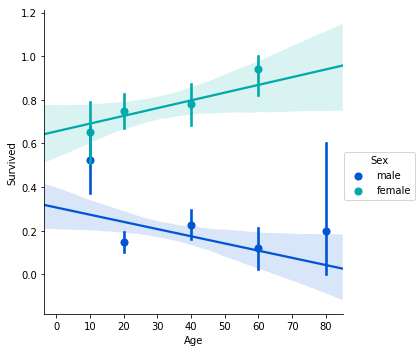

In [94]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [95]:
#Answer the following questions using pandas and seaborn:

#1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
#2.) Did having a family member increase the odds of surviving the crash?

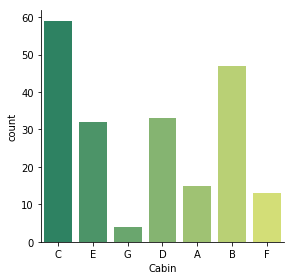

In [98]:
##1.) Did the deck have an effect on the passengers survival rate? 
#Did this answer match up with your intuition?
#deck: independent variable x
#survival: dependent variable y

# Quick factor plot of the decks

sns.factorplot(x='Cabin',data=cabin_df,kind='count',palette='summer')


In [117]:
#preview
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,C


In [118]:
#fill na
titanic_df["Cabin"].fillna("x", inplace = True) 
#preview
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,x,S,male,With Family,no,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,x,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,x,S,male,Alone,no,C
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,x,Q,male,Alone,no,D
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,A
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,x,S,child,With Family,no,C
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,x,S,female,With Family,yes,B
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,x,C,child,With Family,yes,D


In [121]:
# So let's grab that letter for the deck level 

#grab first letter
titanic_df["CabinLetter"]=titanic_df["Cabin"].str[0]

#preview
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,x,S,male,With Family,no,x
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,x,S,female,Alone,yes,x
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,x,S,male,Alone,no,x


In [123]:
sns.lmplot(x='CabinLetter',y='Survived',data=titanic_df,hue='Sex',data=titanic_df,palette='winter')

SyntaxError: keyword argument repeated (<ipython-input-123-f1e603353a7e>, line 1)

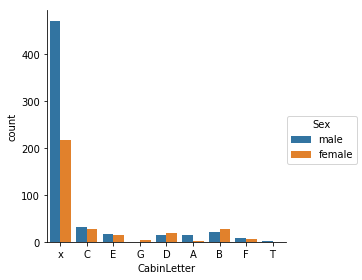

In [125]:
sns.factorplot(x='CabinLetter',kind='count',hue='Sex',data=titanic_df)

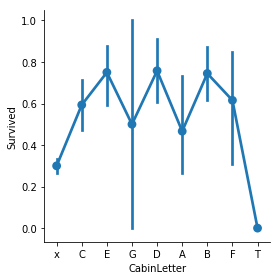

In [129]:
#factor plot, considering Deck versus Survived
sns.factorplot(x='CabinLetter',y='Survived',data=titanic_df)

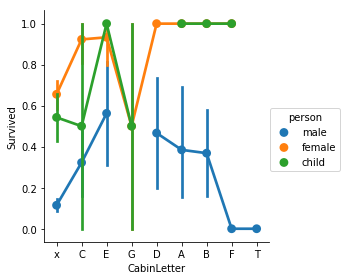

In [131]:
# Let's use a factor plot again, but now considering Gender and Deck versus survived
sns.factorplot(x='CabinLetter',y='Survived',data=titanic_df,hue='person')

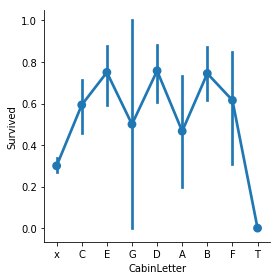

In [133]:
#factor plot, considering Deck versus Survived
deckorder = ['A','B','C','D','E','F','G','T','x']
sns.factorplot(x='CabinLetter',y='Survived',data=titanic_df,x_order=deckorder)

In [135]:
#last question: 
#2.) Did having a family member increase the odds of surviving the crash?

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,x,S,male,With Family,no,x
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,x,S,female,Alone,yes,x
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,x,S,male,Alone,no,x


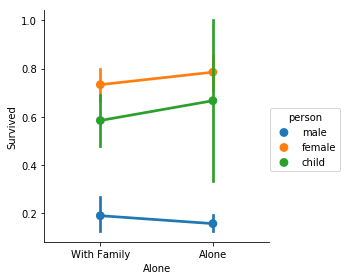

In [137]:
#plot on Alone versus Survival using hue for Gender separation
sns.factorplot(x='Alone',y='Survived',data=titanic_df,hue='person')

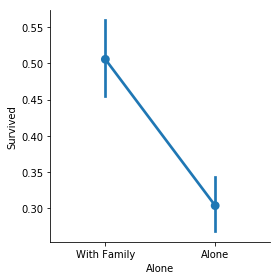

In [138]:
#plot on Alone versus Survival
sns.factorplot(x='Alone',y='Survived',data=titanic_df)

In [139]:
from IPython.display import Image

In [144]:
Image(url='http://i.imgur.com/DGNjT.gif')